In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Reading file

In [2]:
missing_values = ['missing','N\\a','N\a','Na','Null','-',0, np.nan]
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\loan_data.csv',na_values = missing_values)

## Inspecting null values

In [3]:
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents           360
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount            22
Loan_Amount_Term      14
Credit_History       139
Property_Area          0
Loan_Status            0
dtype: int64

## Handling null values

In [4]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)

In [5]:
df['Married'].fillna(df['Married'].mode()[0], inplace = True)

In [6]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [7]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [8]:
df['CoapplicantIncome'].astype(float)

0         NaN
1      1508.0
2         NaN
3      2358.0
4         NaN
        ...  
609       NaN
610       NaN
611     240.0
612       NaN
613       NaN
Name: CoapplicantIncome, Length: 614, dtype: float64

In [9]:
df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean(), inplace = True)

In [10]:
df['LoanAmount'].astype(float)

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [11]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [12]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)

#### in credit history only the people who have a credit history have values filled with 1, so we will fill the empty cells with 0 values which indicated that these people do not have a credit history

In [13]:
df['Credit_History'].fillna(0, inplace = True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### checking the relationship between credit history and loan status

In [15]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,95,44,139
1.0,97,378,475
All,192,422,614


## Checking outliers

<Axes: >

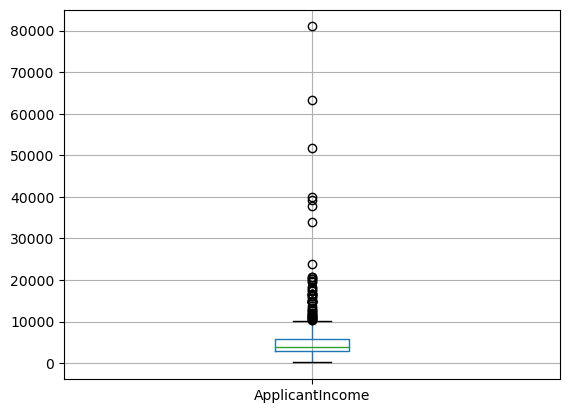

In [16]:
df.boxplot(column = 'ApplicantIncome')

<Axes: >

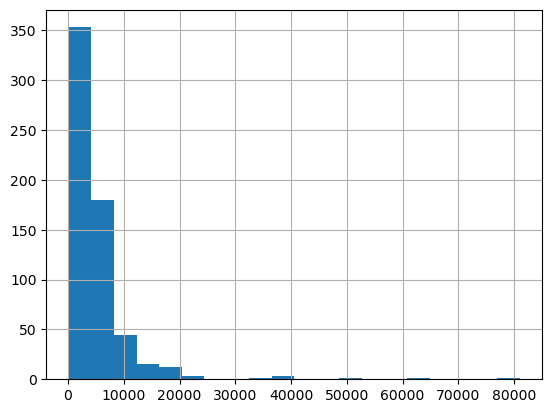

In [17]:
df['ApplicantIncome'].hist(bins=20)

#### from the above histogram and box plot we can see that outliers exist in applicants' income

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

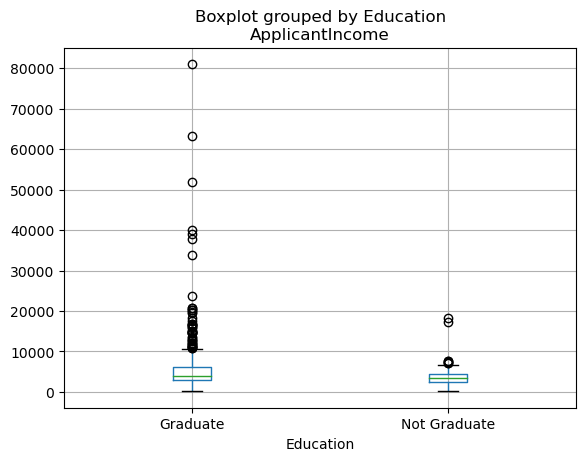

In [18]:
df.boxplot(column = 'ApplicantIncome', by = 'Education')

#### we can see from this box plot that some extreme variations exist in the income of people who are graduate and of those who are not

<Axes: >

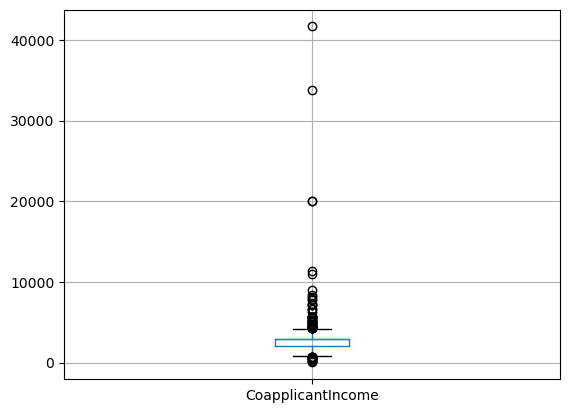

In [19]:
df.boxplot(column='CoapplicantIncome')

<Axes: >

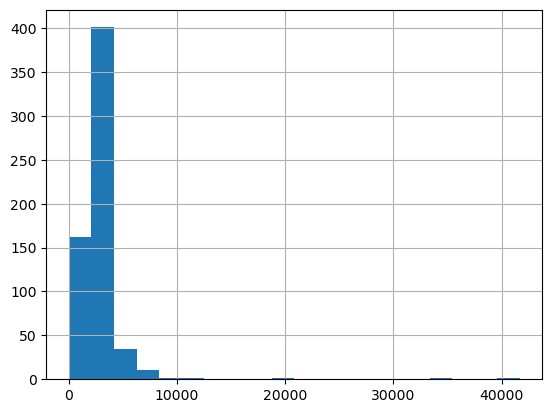

In [20]:
df.CoapplicantIncome.hist(bins=20)

there are outliers in coapplicants' income too

<Axes: >

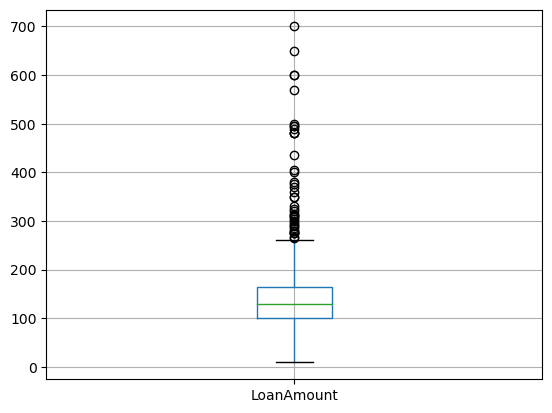

In [21]:
df.boxplot(column = 'LoanAmount')

<Axes: >

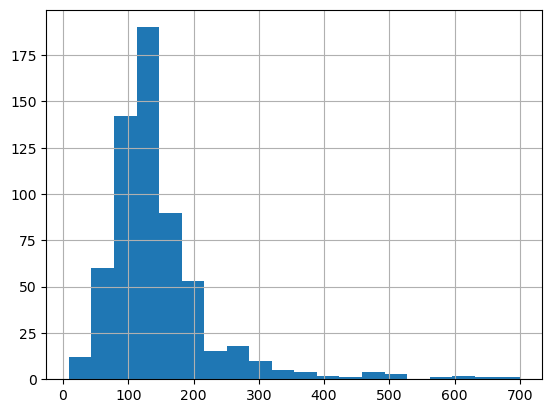

In [22]:
df.LoanAmount.hist(bins=20)

#### loan amount graph is also rightly skewed, so we need to normalize it too.

In [23]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

#### now when we have normalized loan amount, lets make it graph to check

<Axes: >

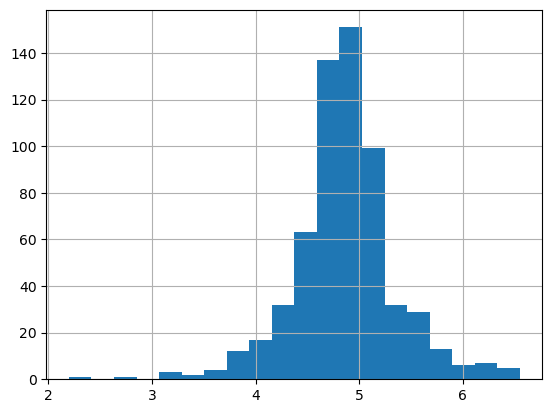

In [24]:
df.LoanAmount_log.hist(bins=20)

#### now loan amount is normalized, meaning it does not contain outliers

### now lets normalize total income i.e. sum of applicant and coapplicants' income

<Axes: >

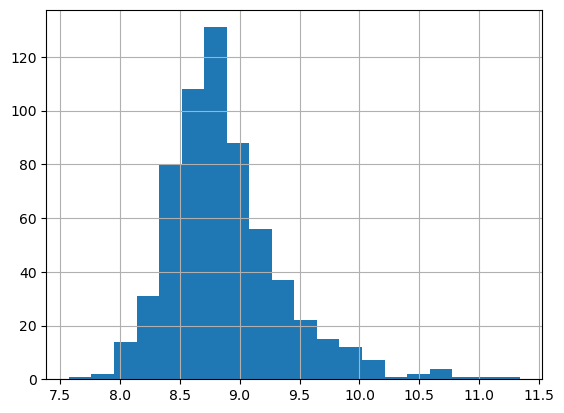

In [25]:
df['total_income'] = np.log(df.ApplicantIncome + df.CoapplicantIncome)
df['total_income'].hist(bins=20)

#### now our total income is normalized as we can see from this graph

In [26]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,total_income
0,LP001002,Male,No,1,Graduate,No,5849,2919.193314,146.412162,360.0,1.0,Urban,Y,4.986426,9.078886
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,1,Graduate,Yes,3000,2919.193314,66.000000,360.0,1.0,Urban,Y,4.189655,8.685955
3,LP001006,Male,Yes,1,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,1,Graduate,No,6000,2919.193314,141.000000,360.0,1.0,Urban,Y,4.948760,9.095961


## now when we have handled missing values and have also normalized outliers, lets divide out dataset into independent and dependent variables

### x will be our independent variables or predictors and y will be the dependent variable

In [27]:
x = df.loc[:,'Gender':'Self_Employed'].join(df.loc[:,'Loan_Amount_Term':'Property_Area']).join(df.loc[:,'LoanAmount_log':'total_income']).values

In [28]:
x

array([['Male', 'No', '1', ..., 'Urban', 4.986425672954842,
        9.078886056589559],
       ['Male', 'Yes', '1', ..., 'Rural', 4.852030263919617,
        8.714567550836485],
       ['Male', 'Yes', '1', ..., 'Urban', 4.189654742026425,
        8.68595545402388],
       ...,
       ['Male', 'Yes', '1', ..., 'Urban', 5.53338948872752,
        9.025455532779063],
       ['Male', 'Yes', '2', ..., 'Urban', 5.231108616854587,
        9.259339401355536],
       ['Female', 'No', '1', ..., 'Semiurban', 4.890349128221754,
        8.922950698604915]], dtype=object)

In [29]:
y = df.loc[:,'Loan_Status'].values
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

### now lets split the dataset for training and testing

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state = 0)

## to convert catageorical values into numerical values we will use label encoder

In [31]:
labelencoder_x = LabelEncoder()

In [32]:
for i in range(0,5):
    x_train[:,i] = labelencoder_x.fit_transform(x_train[:,i])

In [33]:
x_train

array([[1, 1, 0, ..., 'Semiurban', 4.875197323201151, 8.675563527387679],
       [1, 0, 0, ..., 'Semiurban', 5.278114659230517, 9.558825401900451],
       [1, 1, 0, ..., 'Rural', 5.003946305945459, 8.644882552557126],
       ...,
       [1, 1, 2, ..., 'Semiurban', 5.298317366548036, 9.0280988119824],
       [1, 1, 0, ..., 'Urban', 5.075173815233827, 9.099653844234663],
       [0, 1, 0, ..., 'Semiurban', 5.204006687076795, 8.777401286867264]],
      dtype=object)

In [34]:
x_train[:,7] = labelencoder_x.fit_transform(x_train[:,7])

In [35]:
x_train

array([[1, 1, 0, ..., 1, 4.875197323201151, 8.675563527387679],
       [1, 0, 0, ..., 1, 5.278114659230517, 9.558825401900451],
       [1, 1, 0, ..., 0, 5.003946305945459, 8.644882552557126],
       ...,
       [1, 1, 2, ..., 1, 5.298317366548036, 9.0280988119824],
       [1, 1, 0, ..., 2, 5.075173815233827, 9.099653844234663],
       [0, 1, 0, ..., 1, 5.204006687076795, 8.777401286867264]],
      dtype=object)

In [36]:
labelencoder_y = LabelEncoder()

In [37]:
y_train = labelencoder_y.fit_transform(y_train)

In [38]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

### we have convert categorical values into numerical values of training data now lets do the same for testing dat

In [39]:
for i in range(0,5):
    x_test[:,i] = labelencoder_x.fit_transform(x_test[:,i])

In [40]:
x_test[:,7] = labelencoder_x.fit_transform(x_test[:,7])

In [41]:
y_test = labelencoder_y.fit_transform(y_test)

In [42]:
x_test

array([[1, 0, 0, ..., 1, 4.430816798843313, 9.21075961545632],
       [0, 0, 0, ..., 1, 4.718498871295094, 8.874754806071238],
       [1, 1, 0, ..., 2, 5.780743515792329, 9.214232786691527],
       ...,
       [1, 1, 0, ..., 1, 6.077642243349034, 9.770081484272447],
       [1, 1, 2, ..., 2, 4.248495242049359, 8.436200032206706],
       [1, 1, 0, ..., 2, 4.564348191467836, 8.13973227971767]],
      dtype=object)

In [43]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

#### now we will scale our dataset, it is important while applying a ML algorithm becuase you have different variables and they have different ranges.

In [44]:
ss = StandardScaler()

In [45]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

## now we will start implementing our ML algorithm

In [46]:
model = DecisionTreeClassifier()

In [47]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
predictions = model.predict(x_test)
predictions 

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

### now the model has predicted the value, so lets check its accuracy sore

In [49]:
accuracy_score(y_test, predictions)

0.7073170731707317

### it shows 70% accuracy which is not so great so lets apply another model

In [54]:
from sklearn.naive_bayes import GaussianNB
model_2 = GaussianNB()

In [56]:
model_2.fit(x_train,y_train)

GaussianNB()

In [52]:
predictions_2 = model_2.predict(x_test)

In [57]:
accuracy_score(y_test,predictions_2)

0.7886178861788617

## since it is showing 79% accuracy, we will go with this model